# Model Optimization Attempts

## Attempt 1: further consolidation of the features, addition of another hidden layer, bump up the node count
###  Preprocessing the Data for a Neural Network

In [455]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 

In [456]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [457]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN', 'NAME'],axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [458]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [459]:
# Iterate over columns can get the value_count()
for column in application_df:
    print(application_df[column].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000

## First bin the ASK_AMT column

In [460]:
# Establish the bins.
# ASK_AMT_bins = [0, 5000, 25000, 50000, 100000, 500000, 100000000]
#group_names = ["A", "B", "C", "D", "E", 'F']

ASK_AMT_bins = [0, 5000, 500000, 100000000]
group_names = ["A", "B", "C"]
# Categorize spending based on the bins.
application_df["Amt_Binned"] = pd.cut(application_df.ASK_AMT, ASK_AMT_bins, labels=group_names)

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,Amt_Binned
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,A
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,B
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,A
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,B
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,B


In [461]:
#Drop the ASK_AMT column and make sure we have what we want going forward
application_df = application_df.drop('ASK_AMT', axis=1)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL', 'Amt_Binned'],
      dtype='object')

## Consolidate the application types

In [462]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.value_counts('APPLICATION_TYPE')
app_type_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

<AxesSubplot:ylabel='Density'>

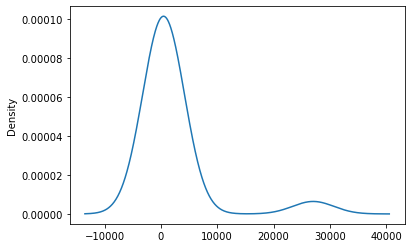

In [463]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [464]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

## Consolidate the Classification column

In [465]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.value_counts('CLASSIFICATION')
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2380        1
C2500        1
C2561        1
C8210        1
Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

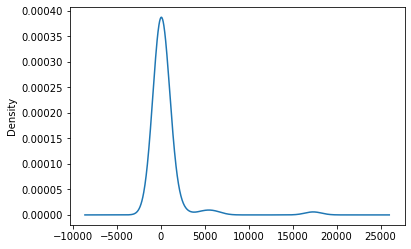

In [466]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [467]:
# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 500].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

## Consolidate the AFFILIATION column

In [468]:
aff_counts = application_df.value_counts('AFFILIATION')
aff_counts

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
dtype: int64

In [469]:
# Determine which values to replace if counts are less than 1000
replace_aff = list(aff_counts[aff_counts < 1000].index)
# Replace in dataframe
for cls in replace_aff:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [470]:
# Iterate over columns can get the value_count()
for column in application_df:
    print(application_df[column].value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64
N    34272
Y       27
Name

In [471]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL', 'Amt_Binned'],
      dtype='object')

In [472]:
final_df = application_df.drop(columns=['SPECIAL_CONSIDERATIONS', 'INCOME_AMT', 'STATUS'])
final_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,IS_SUCCESSFUL,Amt_Binned
0,T10,Independent,C1000,ProductDev,Association,1,A
1,T3,Independent,C2000,Preservation,Co-operative,1,B
2,T5,CompanySponsored,C3000,ProductDev,Association,0,A
3,T3,CompanySponsored,C2000,Preservation,Trust,1,B
4,T3,Independent,C1000,Heathcare,Trust,1,B
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,A
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,A
34296,T3,CompanySponsored,C2000,Preservation,Association,0,A
34297,T5,Independent,C3000,ProductDev,Association,1,A


In [473]:
# Iterate over columns can get the value_count()
for column in final_df:
    print(final_df[column].value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64
A    25398
B     6674
C     2126
Name: Amt_Binned, dtype: int64


In [474]:
# Generate our categorical variable lists
final_cat = list(final_df.select_dtypes(include=['object', 'category']))
final_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'Amt_Binned']

In [475]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(final_df[final_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(final_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Amt_Binned_A,Amt_Binned_B,Amt_Binned_C,Amt_Binned_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [476]:
# Merge one-hot encoded features and drop the originals
model_data_df = final_df.merge(encode_df,left_index=True, right_index=True)

In [477]:
model_data_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,IS_SUCCESSFUL,Amt_Binned,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Amt_Binned_A,Amt_Binned_B,Amt_Binned_C,Amt_Binned_nan
0,T10,Independent,C1000,ProductDev,Association,1,A,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1,B,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,T5,CompanySponsored,C3000,ProductDev,Association,0,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,B,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,1,B,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,A,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34297,T5,Independent,C3000,ProductDev,Association,1,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [478]:
model_data_df = model_data_df.drop(final_cat,1)
model_data_df.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\3568835425.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model_data_df = model_data_df.drop(final_cat,1)


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Amt_Binned_A,Amt_Binned_B,Amt_Binned_C,Amt_Binned_nan
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [479]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [480]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [481]:
#Check the balance of the training target
from collections import Counter
Counter(y_train)

Counter({0: 12001, 1: 13723})

### Compile, Train and Evaluate the Model

In [482]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 66
hidden_nodes_layer2 = 33
hidden_nodes_layer3 = 10

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, 
    activation="relu"
))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 66)                2178      
                                                                 
 dense_81 (Dense)            (None, 33)                2211      
                                                                 
 dense_82 (Dense)            (None, 10)                340       
                                                                 
 dense_83 (Dense)            (None, 1)                 11        
                                                                 
Total params: 4,740
Trainable params: 4,740
Non-trainable params: 0
_________________________________________________________________


In [483]:
# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [484]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new/",exist_ok=True)
checkpoint_path = "checkpoints_new/weights.{epoch:02d}.hdf5"

In [485]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 3s 2ms/step - loss: 0.5680 - accuracy: 0.7170
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5522 - accuracy: 0.7292
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7302
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7293
Epoch 5/200
794/804 [============================>.] - ETA: 0s - loss: 0.5478 - accuracy: 0.7296
Epoch 5: saving model to checkpoints_new\weights.05.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5482 - accuracy: 0.7294
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.7314
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7314
Epoch 8/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5462 - accuracy: 0.7317
Epoch 9/200
804/804 [=============================

804/804 [==============================] - 2s 2ms/step - loss: 0.5396 - accuracy: 0.7362
Epoch 64/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7360
Epoch 65/200
801/804 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7364
Epoch 65: saving model to checkpoints_new\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5396 - accuracy: 0.7362
Epoch 66/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.7363
Epoch 67/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7358
Epoch 68/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7361
Epoch 69/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5391 - accuracy: 0.7363
Epoch 70/200
788/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7358
Epoch 70: saving model to checkpoints_new\weights.70.hdf5


804/804 [==============================] - 3s 3ms/step - loss: 0.5381 - accuracy: 0.7366
Epoch 126/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5379 - accuracy: 0.7361
Epoch 127/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5379 - accuracy: 0.7361
Epoch 128/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5381 - accuracy: 0.7364
Epoch 129/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5377 - accuracy: 0.7361
Epoch 130/200
804/804 [==============================] - ETA: 0s - loss: 0.5378 - accuracy: 0.7360
Epoch 130: saving model to checkpoints_new\weights.130.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5378 - accuracy: 0.7360
Epoch 131/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5377 - accuracy: 0.7367
Epoch 132/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5376 - accuracy: 0.7359
Epoch 133/200
804/804 [======================

804/804 [==============================] - 2s 2ms/step - loss: 0.5370 - accuracy: 0.7361
Epoch 188/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5377 - accuracy: 0.7362
Epoch 189/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5372 - accuracy: 0.7365
Epoch 190/200
787/804 [============================>.] - ETA: 0s - loss: 0.5369 - accuracy: 0.7365
Epoch 190: saving model to checkpoints_new\weights.190.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5371 - accuracy: 0.7365
Epoch 191/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5372 - accuracy: 0.7369
Epoch 192/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accuracy: 0.7366
Epoch 193/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5372 - accuracy: 0.7365
Epoch 194/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5372 - accuracy: 0.7364
Epoch 195/200
780/804 [======================

In [486]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5604 - accuracy: 0.7284 - 421ms/epoch - 2ms/step
Loss: 0.5603553652763367, Accuracy: 0.728396475315094


In [487]:
# Export the model to HDF5 file
nn_new.save("trained_application_new_v1.h5")

<AxesSubplot:>

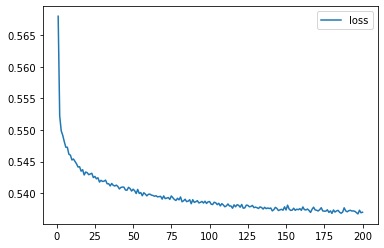

In [488]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

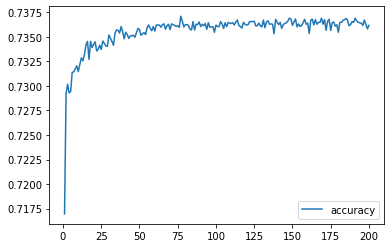

In [489]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 2: Give the model all of the data

In [490]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [491]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN', 'NAME'],axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [492]:
# Generate our categorical variable lists
final_cat = list(application_df.select_dtypes(include=['object', 'category']))
final_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [493]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[final_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(final_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [494]:
# Merge one-hot encoded features and drop the originals
model_data_df = application_df.merge(encode_df,left_index=True, right_index=True)
model_data_df = model_data_df.drop(final_cat,1)
model_data_df.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\4135013742.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model_data_df = model_data_df.drop(final_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [495]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [496]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [497]:
#Check the balance of the training target
from collections import Counter
Counter(y_train)

Counter({0: 12001, 1: 13723})

### Compile, Train and Evaluate the Model

In [498]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*number_input_features
hidden_nodes_layer2 = 150
hidden_nodes_layer3 = 50

nn_new_v2 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v2.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Third hidden layer
nn_new_v2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, 
    activation="relu"
))

# Output layer
nn_new_v2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 348)               40716     
                                                                 
 dense_85 (Dense)            (None, 150)               52350     
                                                                 
 dense_86 (Dense)            (None, 50)                7550      
                                                                 
 dense_87 (Dense)            (None, 1)                 51        
                                                                 
Total params: 100,667
Trainable params: 100,667
Non-trainable params: 0
_________________________________________________________________


In [499]:
# Compile the model
nn_new_v2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [500]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v2/",exist_ok=True)
checkpoint_path = "checkpoints_new_v2/weights.{epoch:02d}.hdf5"

In [501]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v2.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5692 - accuracy: 0.7227
Epoch 2/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5521 - accuracy: 0.7300
Epoch 3/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5487 - accuracy: 0.7306
Epoch 4/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.7317
Epoch 5/200
792/804 [============================>.] - ETA: 0s - loss: 0.5470 - accuracy: 0.7322
Epoch 5: saving model to checkpoints_new_v2\weights.05.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5464 - accuracy: 0.7328
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5445 - accuracy: 0.7338
Epoch 7/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5446 - accuracy: 0.7334
Epoch 8/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5429 - accuracy: 0.7358
Epoch 9/200
804/804 [==========================

Epoch 63/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5280 - accuracy: 0.7423
Epoch 64/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5414 - accuracy: 0.7428
Epoch 65/200
794/804 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7426
Epoch 65: saving model to checkpoints_new_v2\weights.65.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5274 - accuracy: 0.7428
Epoch 66/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5271 - accuracy: 0.7425
Epoch 67/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5280 - accuracy: 0.7428
Epoch 68/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5281 - accuracy: 0.7427
Epoch 69/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.7430
Epoch 70/200
796/804 [============================>.] - ETA: 0s - loss: 0.5273 - accuracy: 0.7433
Epoch 70: saving model to checkpoints_new_

801/804 [============================>.] - ETA: 0s - loss: 0.5283 - accuracy: 0.7431
Epoch 125: saving model to checkpoints_new_v2\weights.125.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5282 - accuracy: 0.7430
Epoch 126/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5261 - accuracy: 0.7435
Epoch 127/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5277 - accuracy: 0.7436
Epoch 128/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5246 - accuracy: 0.7434
Epoch 129/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5250 - accuracy: 0.7437
Epoch 130/200
804/804 [==============================] - ETA: 0s - loss: 0.5245 - accuracy: 0.7433
Epoch 130: saving model to checkpoints_new_v2\weights.130.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5245 - accuracy: 0.7433
Epoch 131/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5245 - accuracy: 0.74

Epoch 186/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.7441
Epoch 187/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.7439
Epoch 188/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5254 - accuracy: 0.7443
Epoch 189/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5267 - accuracy: 0.7427
Epoch 190/200
796/804 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7445
Epoch 190: saving model to checkpoints_new_v2\weights.190.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5291 - accuracy: 0.7446
Epoch 191/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5351 - accuracy: 0.7440
Epoch 192/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7435
Epoch 193/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5236 - accuracy: 0.7444
Epoch 194/200
804/804 [=====

In [502]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6315 - accuracy: 0.7300 - 641ms/epoch - 2ms/step
Loss: 0.6314775347709656, Accuracy: 0.7300291657447815


In [503]:
# Export the model to HDF5 file
nn_new_v2.save("trained_application_new_v2.h5")

<AxesSubplot:>

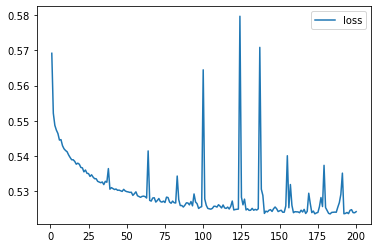

In [504]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

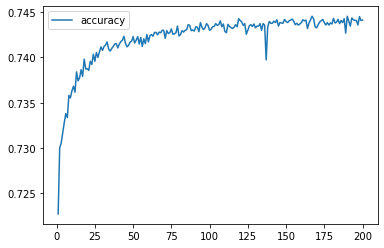

In [505]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 3: give the model all the data but tweak model parameters

In [506]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [507]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN', 'NAME'],axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [508]:
# Generate our categorical variable lists
final_cat = list(application_df.select_dtypes(include=['object', 'category']))
final_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [509]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[final_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(final_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [510]:
# Merge one-hot encoded features and drop the originals
model_data_df = application_df.merge(encode_df,left_index=True, right_index=True)
model_data_df = model_data_df.drop(final_cat,1)
model_data_df.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\4135013742.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model_data_df = model_data_df.drop(final_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [511]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [512]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [513]:
#Check the balance of the training target
from collections import Counter
Counter(y_train)

Counter({0: 12001, 1: 13723})

### Compile, Train and Evaluate the Model

In [514]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 10

nn_new_v3 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v3.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v3.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 50)                5850      
                                                                 
 dense_89 (Dense)            (None, 10)                510       
                                                                 
 dense_90 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,371
Trainable params: 6,371
Non-trainable params: 0
_________________________________________________________________


In [515]:
# Compile the model
nn_new_v3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [516]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v3/",exist_ok=True)
checkpoint_path = "checkpoints_new_v3/weights.{epoch:02d}.hdf5"

In [517]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v3.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5846 - accuracy: 0.7138
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7291
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7314
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7328
Epoch 5/200
778/804 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.7331
Epoch 5: saving model to checkpoints_new_v3\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7322
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5456 - accuracy: 0.7335
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5447 - accuracy: 0.7334
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5443 - accuracy: 0.7340
Epoch 9/200
804/804 [==========================

Epoch 63/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5332 - accuracy: 0.7404
Epoch 64/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7391
Epoch 65/200
792/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7385
Epoch 65: saving model to checkpoints_new_v3\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5332 - accuracy: 0.7388
Epoch 66/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7399
Epoch 67/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7397
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7403
Epoch 69/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.7398
Epoch 70/200
804/804 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.7400
Epoch 70: saving model to checkpoints_new_

800/804 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7401
Epoch 125: saving model to checkpoints_new_v3\weights.125.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7400
Epoch 126/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5299 - accuracy: 0.7405
Epoch 127/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5300 - accuracy: 0.7407
Epoch 128/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7399
Epoch 129/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7401
Epoch 130/200
782/804 [============================>.] - ETA: 0s - loss: 0.5299 - accuracy: 0.7401
Epoch 130: saving model to checkpoints_new_v3\weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7402
Epoch 131/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.74

Epoch 186/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5285 - accuracy: 0.7416
Epoch 187/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5289 - accuracy: 0.7411
Epoch 188/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7416
Epoch 189/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.7412
Epoch 190/200
804/804 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.7416
Epoch 190: saving model to checkpoints_new_v3\weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.7416
Epoch 191/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7420
Epoch 192/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5290 - accuracy: 0.7410
Epoch 193/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5292 - accuracy: 0.7413
Epoch 194/200
804/804 [=====

In [518]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5574 - accuracy: 0.7296 - 463ms/epoch - 2ms/step
Loss: 0.5574012398719788, Accuracy: 0.7295626997947693


In [519]:
# Export the model to HDF5 file
nn_new_v3.save("trained_application_new_v3.h5")

<AxesSubplot:>

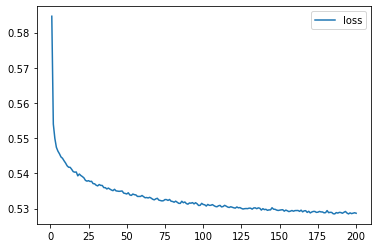

In [520]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

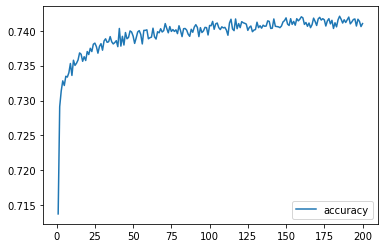

In [521]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Atempt 4

In [522]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 150
hidden_nodes_layer2 = 75
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 25

nn_new_v4 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v4.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 150)               17550     
                                                                 
 dense_92 (Dense)            (None, 75)                11325     
                                                                 
 dense_93 (Dense)            (None, 75)                5700      
                                                                 
 dense_94 (Dense)            (None, 75)                5700      
                                                                 
 dense_95 (Dense)            (None, 1)                 76        
                                                                 
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________


In [523]:
# Compile the model
nn_new_v4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [524]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v4/",exist_ok=True)
checkpoint_path = "checkpoints_new_v4/weights.{epoch:02d}.hdf5"

In [525]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v4.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5699 - accuracy: 0.7214
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7313
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7321
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7323
Epoch 5/200
788/804 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7354
Epoch 5: saving model to checkpoints_new_v4\weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5453 - accuracy: 0.7352
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5447 - accuracy: 0.7351
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5435 - accuracy: 0.7351
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5425 - accuracy: 0.7353
Epoch 9/200
804/804 [==========================

Epoch 63/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5285 - accuracy: 0.7428
Epoch 64/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7420
Epoch 65/200
799/804 [============================>.] - ETA: 0s - loss: 0.5272 - accuracy: 0.7423
Epoch 65: saving model to checkpoints_new_v4\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5273 - accuracy: 0.7422
Epoch 66/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5283 - accuracy: 0.7422
Epoch 67/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5276 - accuracy: 0.7421
Epoch 68/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5277 - accuracy: 0.7426
Epoch 69/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5278 - accuracy: 0.7423
Epoch 70/200
788/804 [============================>.] - ETA: 0s - loss: 0.5267 - accuracy: 0.7420
Epoch 70: saving model to checkpoints_new_

787/804 [============================>.] - ETA: 0s - loss: 0.5261 - accuracy: 0.7436
Epoch 125: saving model to checkpoints_new_v4\weights.125.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5255 - accuracy: 0.7438
Epoch 126/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5246 - accuracy: 0.7442
Epoch 127/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5247 - accuracy: 0.7434
Epoch 128/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5249 - accuracy: 0.7440
Epoch 129/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5247 - accuracy: 0.7428
Epoch 130/200
795/804 [============================>.] - ETA: 0s - loss: 0.5249 - accuracy: 0.7437
Epoch 130: saving model to checkpoints_new_v4\weights.130.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5247 - accuracy: 0.7440
Epoch 131/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5246 - accuracy: 0.74

Epoch 186/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5229 - accuracy: 0.7445
Epoch 187/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5232 - accuracy: 0.7441
Epoch 188/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5228 - accuracy: 0.7444
Epoch 189/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5232 - accuracy: 0.7439
Epoch 190/200
790/804 [============================>.] - ETA: 0s - loss: 0.5242 - accuracy: 0.7432
Epoch 190: saving model to checkpoints_new_v4\weights.190.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5236 - accuracy: 0.7437
Epoch 191/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5246 - accuracy: 0.7440
Epoch 192/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5232 - accuracy: 0.7439
Epoch 193/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5230 - accuracy: 0.7445
Epoch 194/200
804/804 [=====

In [555]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6755 - accuracy: 0.7306 - 393ms/epoch - 1ms/step
Loss: 0.6754561066627502, Accuracy: 0.7306122183799744


In [556]:
# Export the model to HDF5 file
nn_new_v4.save("trained_application_new_v4.h5")

<AxesSubplot:>

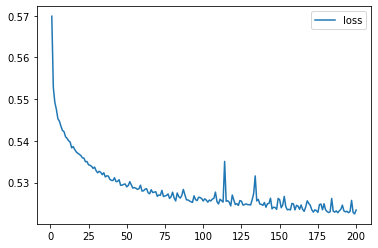

In [528]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

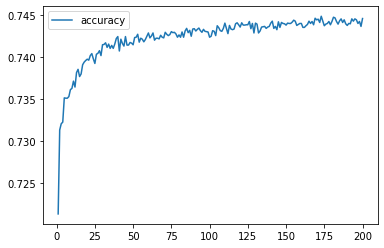

In [529]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 5

In [546]:
def intensive_preprocessing():

    application_df = pd.read_csv("charity_data.csv")
    # Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
    application_df=application_df.drop(columns=['EIN', 'NAME'],axis=1)

    #Bin ASK_AMT
    ASK_AMT_bins = [0, 5000, 500000, 100000000]
    group_names = ["A", "B", "C"]
    # Categorize spending based on the bins.
    application_df["Amt_Binned"] = pd.cut(application_df.ASK_AMT, ASK_AMT_bins, labels=group_names)

    #Drop the ASK_AMT column and make sure we have what we want going forward
    application_df = application_df.drop('ASK_AMT', axis=1)

    # Look at APPLICATION_TYPE value counts for binning
    app_type_count = application_df.value_counts('APPLICATION_TYPE')

    # Determine which values to replace if counts are less than ...?
    replace_application = list(app_type_count[app_type_count < 500].index)

    # Replace in dataframe
    for app in replace_application:
        application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")

    # Look at CLASSIFICATION value counts for binning
    classification_counts = application_df.value_counts('CLASSIFICATION')

    # Determine which values to replace if counts are less than 
    replace_class = list(classification_counts[classification_counts < 500].index)
    # Replace in dataframe
    for cls in replace_class:
        application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")

    # Determine which values to replace if counts are less than 
    replace_class = list(classification_counts[classification_counts < 500].index)
    # Replace in dataframe
    for cls in replace_class:
        application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")

    ## Consolidate the AFFILIATION column    
    aff_counts = application_df.value_counts('AFFILIATION')
    # Determine which values to replace if counts are less than 1000
    replace_aff = list(aff_counts[aff_counts < 1000].index)
    # Replace in dataframe
    for cls in replace_aff:
        application_df.AFFILIATION = application_df.AFFILIATION.replace(cls,"Other")

    final_df = application_df.drop(columns=['SPECIAL_CONSIDERATIONS', 'INCOME_AMT', 'STATUS'])
    # Generate our categorical variable lists
    final_cat = list(final_df.select_dtypes(include=['object', 'category']))

    # Create a OneHotEncoder instance
    enc = OneHotEncoder(sparse=False)

    # Fit and transform the OneHotEncoder using the categorical variable list
    encode_df = pd.DataFrame(enc.fit_transform(final_df[final_cat]))

    # Add the encoded variable names to the dataframe
    encode_df.columns = enc.get_feature_names_out(final_cat)

    # Merge one-hot encoded features and drop the originals
    model_data_df = final_df.merge(encode_df,left_index=True, right_index=True)

    return model_data_df, final_df


In [547]:
intensive_preprocessing()

(      APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
 0                  T10       Independent          C1000    ProductDev   
 1                   T3       Independent          C2000  Preservation   
 2                   T5  CompanySponsored          C3000    ProductDev   
 3                   T3  CompanySponsored          C2000  Preservation   
 4                   T3       Independent          C1000     Heathcare   
 ...                ...               ...            ...           ...   
 34294               T4       Independent          C1000    ProductDev   
 34295               T4  CompanySponsored          C3000    ProductDev   
 34296               T3  CompanySponsored          C2000  Preservation   
 34297               T5       Independent          C3000    ProductDev   
 34298               T3       Independent          C1000  Preservation   
 
        ORGANIZATION  IS_SUCCESSFUL Amt_Binned  APPLICATION_TYPE_Other  \
 0       Association              1 

In [549]:
model_data_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [550]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [551]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*number_input_features
hidden_nodes_layer2 = np.floor(0.5*hidden_nodes_layer1)
hidden_nodes_layer3 = np.floor(0.5*hidden_nodes_layer1)
hidden_nodes_layer4 = np.floor(0.5*hidden_nodes_layer2)

nn_new_v5 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v5.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v5.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 348)               40716     
                                                                 
 dense_102 (Dense)           (None, 174)               60726     
                                                                 
 dense_103 (Dense)           (None, 174)               30450     
                                                                 
 dense_104 (Dense)           (None, 174)               30450     
                                                                 
 dense_105 (Dense)           (None, 1)                 175       
                                                                 
Total params: 162,517
Trainable params: 162,517
Non-trainable params: 0
_________________________________________________________________


In [552]:
# Compile the model
nn_new_v5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [553]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v5/",exist_ok=True)
checkpoint_path = "checkpoints_new_v5/weights.{epoch:02d}.hdf5"

In [554]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v5.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5709 - accuracy: 0.7208
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5540 - accuracy: 0.7294
Epoch 3/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5499 - accuracy: 0.7320
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5479 - accuracy: 0.7307
Epoch 5/50
793/804 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7326
Epoch 5: saving model to checkpoints_new_v5\weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5464 - accuracy: 0.7325
Epoch 6/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5452 - accuracy: 0.7337
Epoch 7/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5437 - accuracy: 0.7356
Epoch 8/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5433 - accuracy: 0.7359
Epoch 9/50
804/804 [==============================] - 3

In [557]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5781 - accuracy: 0.7310 - 771ms/epoch - 3ms/step
Loss: 0.5781218409538269, Accuracy: 0.7309620976448059


In [558]:
# Export the model to HDF5 file
nn_new_v5.save("trained_application_new_v5.h5")

<AxesSubplot:>

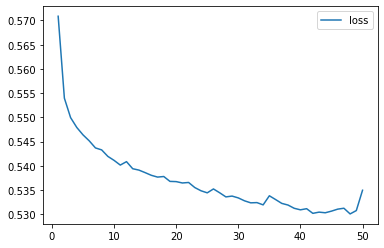

In [559]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

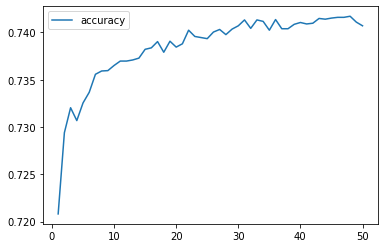

In [560]:
# Plot the accuracy
history_df.plot(y="accuracy")